# Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
hd = ['id','fever','ageInMonths','pulse', 'pulseStateOld', 'pulseStateNew', 'respiratoryRate','respiratoryRateStateOld','respiratoryRateStateNew', 'patientStateOld','patientStateNew']
mod_list = pd.read_csv('./preprocessing/modifiedList.csv', header=[0])

mod_list[['patientStateOld','patientStateNew']].value_counts()

mod_list = mod_list[(mod_list['respiratoryRate'] >= 10) & (mod_list['respiratoryRate'] < 80)]

mod_list = mod_list[(mod_list['pulse'] >= 40) & (mod_list['pulse'] < 220)]

In [4]:
mod_list[['pulseStateOld','pulseStateNew']].value_counts()


pulseStateOld  pulseStateNew
caution        good             160
good           caution          109
               danger           109
caution        danger           103
danger         caution           31
               good              14
caution        neutral            2
good           neutral            2
danger         neutral            1
neutral        danger             1
dtype: int64

In [4]:
mod_list[['respiratoryRateStateOld','respiratoryRateStateNew']].value_counts()


respiratoryRateStateOld  respiratoryRateStateNew
caution                  good                       301
danger                   caution                    111
caution                  danger                      59
good                     caution                     46
danger                   good                         9
caution                  neutral                      5
dtype: int64

In [6]:
def create_plot(dataset, stateKey, key, fever, title, green_label, amber_label, red_label, xlabel, ylabel, xticks, yticks):
    old_state_good = dataset[(dataset[stateKey] == 'good') & (dataset['fever'] == fever)]
    old_state_caution = dataset[(dataset[stateKey] == 'caution') & (dataset['fever'] == fever)]
    old_state_danger = dataset[(dataset[stateKey] == 'danger') & (dataset['fever'] == fever)]

    plt.scatter(old_state_good[key], old_state_good['ageInMonths']/12, label=green_label, color='#44dd44', marker='.', s=20)
    plt.scatter(old_state_caution[key], old_state_caution['ageInMonths']/12, label=amber_label, color='#dd9944', marker='.', s=20)
    plt.scatter(old_state_danger[key], old_state_danger['ageInMonths']/12, label=red_label, color='#dd4444', marker='.', s=20)
    plt.title(title)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.xticks(np.arange(*xticks))
    plt.yticks(np.arange(*yticks))
    plt.legend()


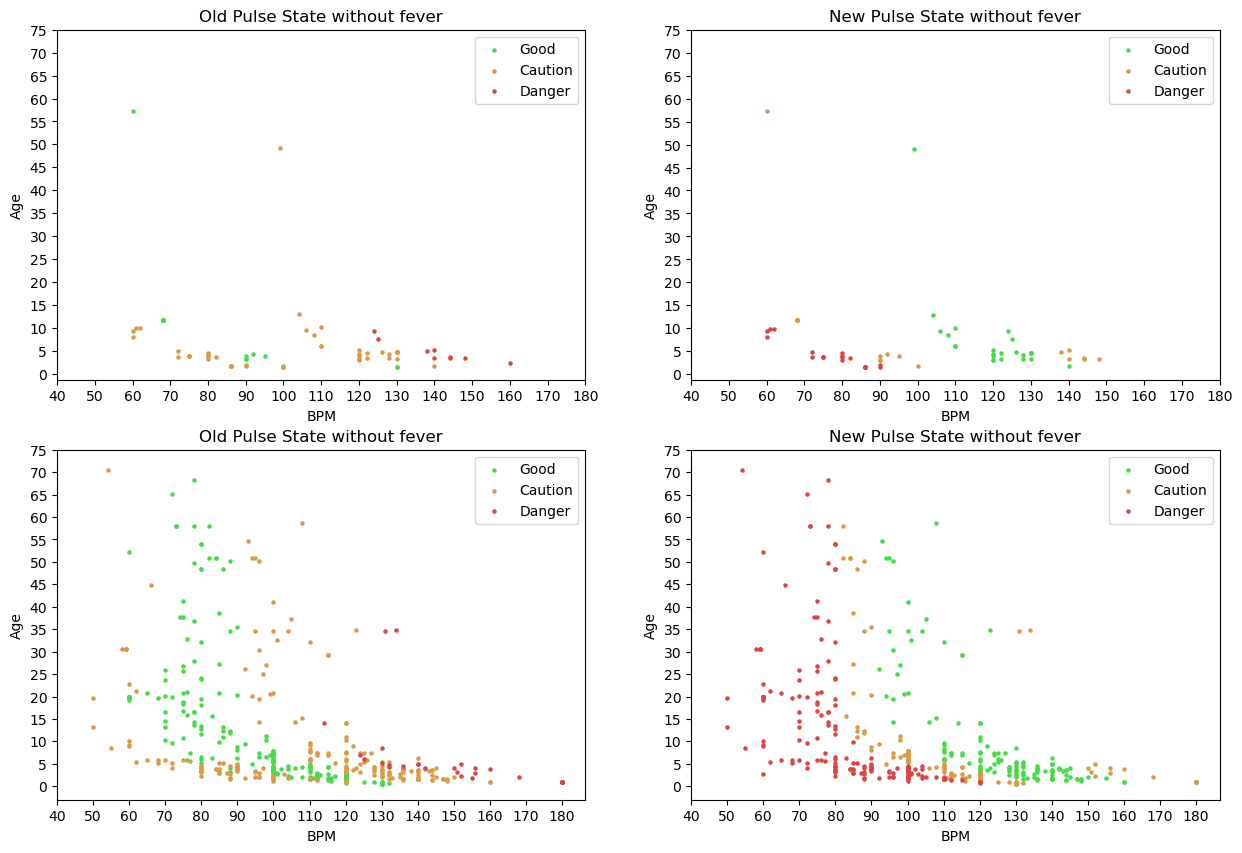

In [10]:
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
xticks = (40,190,10)
yticks = (0,80,5)
labels = ('Age', 'BPM')
state_labels = ('Good', 'Caution', 'Danger')
create_plot(mod_list, 'pulseStateOld', 'pulse', 0, 'Old Pulse State without fever', *state_labels, *labels, xticks, yticks)
plt.subplot(2,2,2)
create_plot(mod_list, 'pulseStateNew', 'pulse', 0, 'New Pulse State without fever', *state_labels, *labels, xticks, yticks)
plt.subplot(2,2,3)
create_plot(mod_list, 'pulseStateOld', 'pulse', 1, 'Old Pulse State without fever', *state_labels, *labels, xticks, yticks)
plt.subplot(2,2,4)
create_plot(mod_list, 'pulseStateNew', 'pulse', 1, 'New Pulse State without fever', *state_labels, *labels, xticks, yticks)
plt.show()

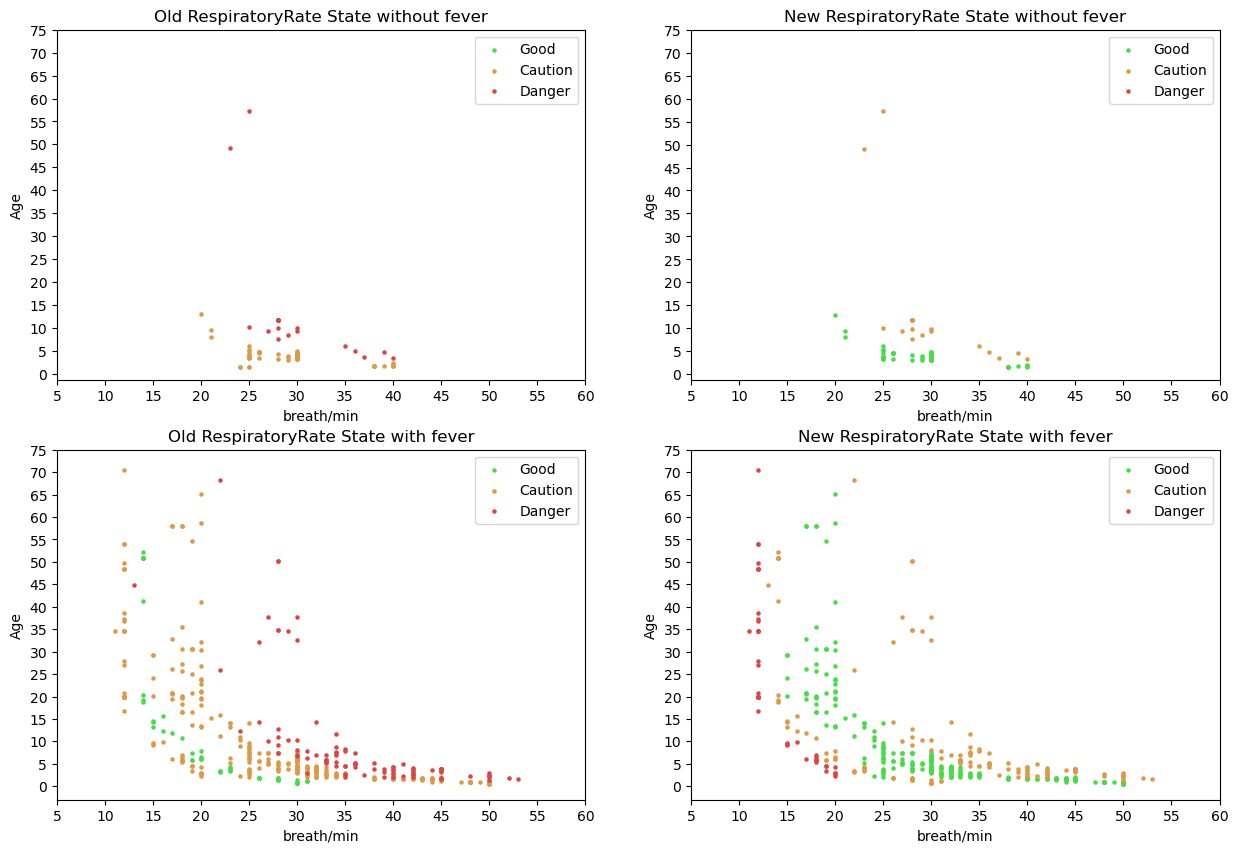

In [14]:
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
xticks = (5,65,5)
yticks = (0,80,5)
labels = ('Age', 'breath/min')
create_plot(mod_list, 'respiratoryRateStateOld', 'respiratoryRate', 0, 'Old RespiratoryRate State without fever', *state_labels, *labels, xticks, yticks)
plt.subplot(2,2,2)
create_plot(mod_list, 'respiratoryRateStateNew', 'respiratoryRate', 0, 'New RespiratoryRate State without fever', *state_labels, *labels, xticks, yticks)
plt.subplot(2,2,3)
create_plot(mod_list, 'respiratoryRateStateOld', 'respiratoryRate', 1, 'Old RespiratoryRate State with fever', *state_labels, *labels, xticks, yticks)
plt.subplot(2,2,4)
create_plot(mod_list, 'respiratoryRateStateNew', 'respiratoryRate', 1, 'New RespiratoryRate State with fever', *state_labels, *labels, xticks, yticks)
plt.show()

In [32]:
mod_list[['respiratoryRateStateOld','respiratoryRateStateNew']].value_counts()

respiratoryRateStateOld  respiratoryRateStateNew
caution                  good                       301
danger                   caution                    111
caution                  danger                      59
good                     caution                     46
danger                   good                         9
caution                  neutral                      5
dtype: int64